[*********************100%***********************]  503 of 503 completed

5 Failed downloads:
['SW', 'GEV', 'SOLV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546318800, endDate = 1704085200")')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19256\801032956.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19256\801032956.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


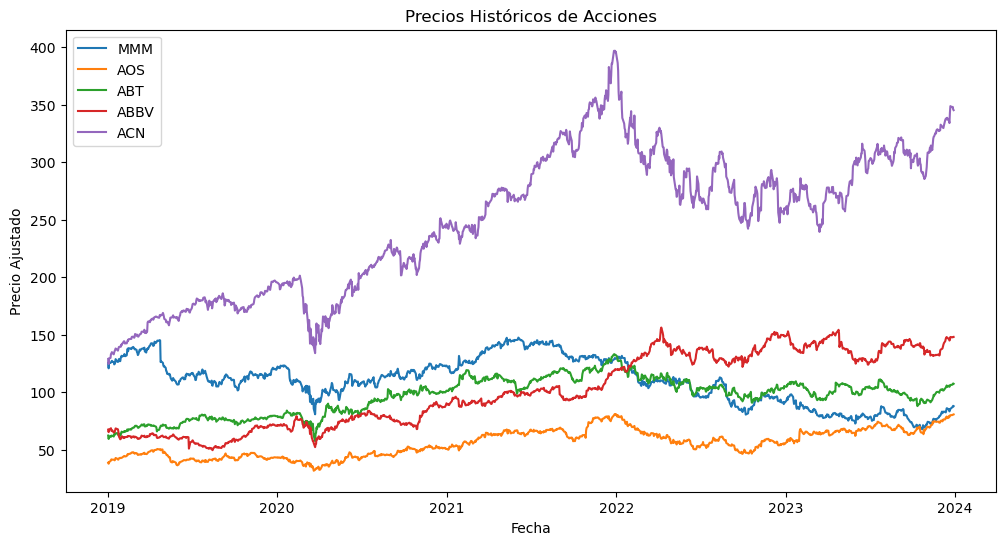

Datos descargados y preprocesados correctamente.


In [1]:
# Notebook 1: Obtención y Preparación de Datos

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de 20 acciones variadas
# tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "JPM", "BAC", "GS", "V", "MA", "PEP", "KO", "PG", "JNJ", "MRNA", "NFLX", "DIS", "IBM"]
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'DECK', 'DE', 'DELL', 'DAL', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DPZ', 'DASH', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ERIE', 'ESS', 'EL', 'EG', 'EVRG', 'ES', 'EXC', 'EXE', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GE', 'GEHC', 'GEV', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GDDY', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KKR', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LII', 'LLY', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PLTR', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SW', 'SNA', 'SOLV', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TER', 'TSLA', 'TXN', 'TPL', 'TXT', 'TMO', 'TJX', 'TKO', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VTRS', 'VICI', 'V', 'VST', 'VMC', 'WRB', 'GWW', 'WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WY', 'WSM', 'WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZTS']

# Definir período de análisis (5 años)
start_date = "2019-01-01"
end_date = "2024-01-01"

# Descargar datos de precios ajustados
# data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Adj Close"]
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]


# Manejo de valores faltantes (forward-fill y backward-fill)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Guardar datos procesados
data.to_csv("acciones_preprocesadas.csv")

# Visualización de precios de algunas acciones
plt.figure(figsize=(12,6))
for ticker in tickers[:5]:  # Graficar solo 5 acciones como ejemplo
    plt.plot(data.index, data[ticker], label=ticker)
plt.legend()
plt.title("Precios Históricos de Acciones")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado")
plt.show()

print("Datos descargados y preprocesados correctamente.")



In [25]:
data.T.index

Index(['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', length=503)

In [ ]:
import sqlite3
# Consultar datos
conn = sqlite3.connect('sp500_2.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM acciones")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df = pd.DataFrame(filas, columns=column_names)
df = df.drop(df[df["beta"].isna()].index)  # Eliminar filas con valores nulos en shortName
df.isna().sum()  # Verificar si hay valores nulos
df = df.fillna(0)  # Reemplazar valores nulos por 0

data = data.T
df = df.merge(data.reset_index(), left_on="symbol", right_on="index", how="left").drop(columns=["index"])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19256\733124623.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)  # Reemplazar valores nulos por 0


In [34]:
df.to_csv("acciones_preprocesadas.csv")

In [48]:
datos = pd.read_csv("acciones_preprocesadas.csv", index_col=0, parse_dates=True)
subset = datos.filter(like="20", axis=1)
subset.index = datos["symbol"]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19256\3872938271.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_csv("acciones_preprocesadas.csv", index_col=0, parse_dates=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19256\2548956673.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_csv("acciones_preprocesadas.csv", index_col=0, parse_dates=True)
c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option 

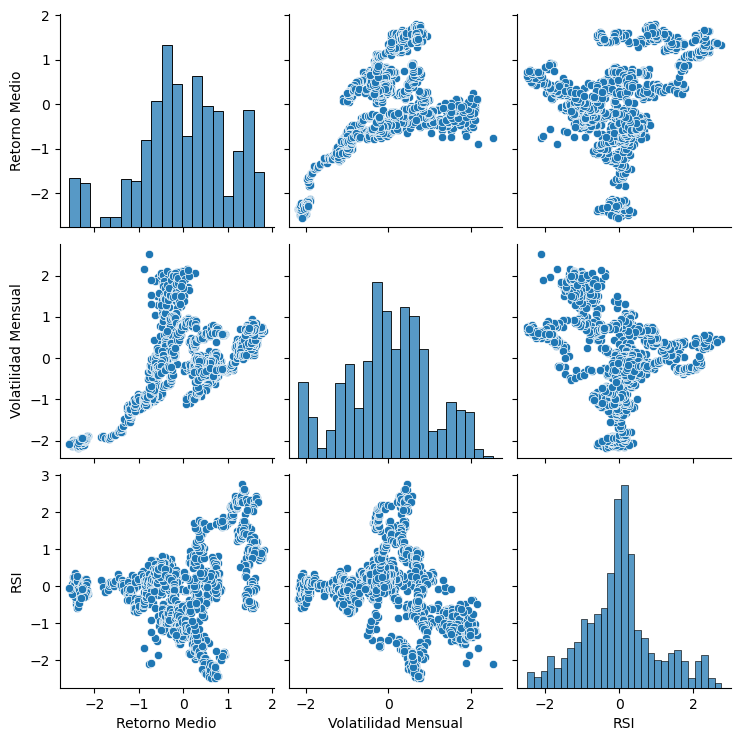

Feature Engineering completado y guardado.


In [50]:
# Notebook 2: Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de precios procesados
datos = pd.read_csv("acciones_preprocesadas.csv", index_col=0, parse_dates=True)
data = datos.filter(like="20", axis=1)
data.index = datos["symbol"]


# Cálculo de retornos logarítmicos diarios
returns = np.log(data / data.shift(1))

# Volatilidad (desviación estándar de los retornos) a nivel semanal y mensual
volatility_weekly = returns.rolling(5).std()
volatility_monthly = returns.rolling(21).std()

# RSI (Relative Strength Index) - 14 días
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0).rolling(period).mean()
    loss = -delta.where(delta < 0, 0).rolling(period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_14 = data.apply(calculate_rsi)

# Máximos y mínimos históricos en los últimos 5 años
rolling_max = data.rolling(window=252).max()
rolling_min = data.rolling(window=252).min()

# Normalización de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(pd.concat([returns.mean(), volatility_monthly.mean(), rsi_14.mean()], axis=1)),
                        columns=['Retorno Medio', 'Volatilidad Mensual', 'RSI'],
                        index=data.columns)

# Guardar features procesadas
features.to_csv("features_acciones.csv")

# Visualización de distribución de features
sns.pairplot(features)
plt.show()

print("Feature Engineering completado y guardado.")

Resumen estadístico de las características:
       Retorno Medio  Volatilidad Mensual           RSI
count   4.980000e+02         4.980000e+02  4.980000e+02
mean   -2.282868e-16         1.070094e-17  2.329239e-15
std     1.001006e+00         1.001006e+00  1.001006e+00
min    -3.088391e+00        -3.386465e+00 -5.503852e+00
25%    -5.918179e-01        -6.538726e-01 -6.241934e-01
50%    -6.654978e-02        -1.864248e-01  1.945362e-03
75%     4.891011e-01         4.759674e-01  6.462317e-01
max     4.921272e+00         4.558527e+00  2.569621e+00


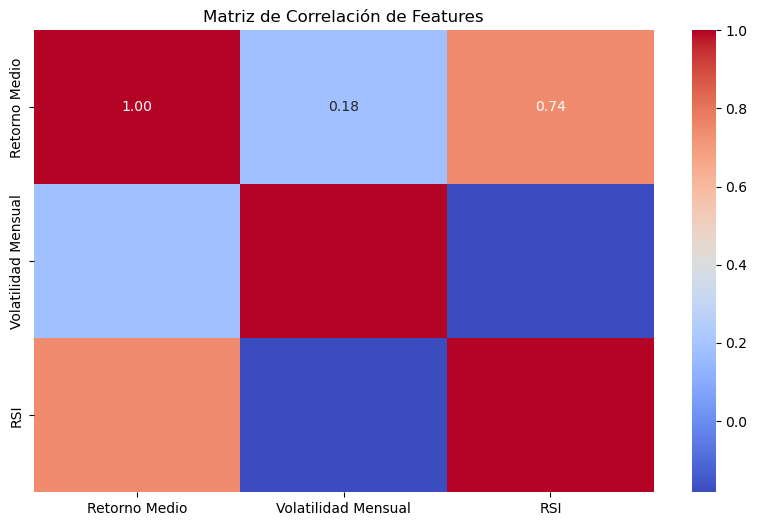

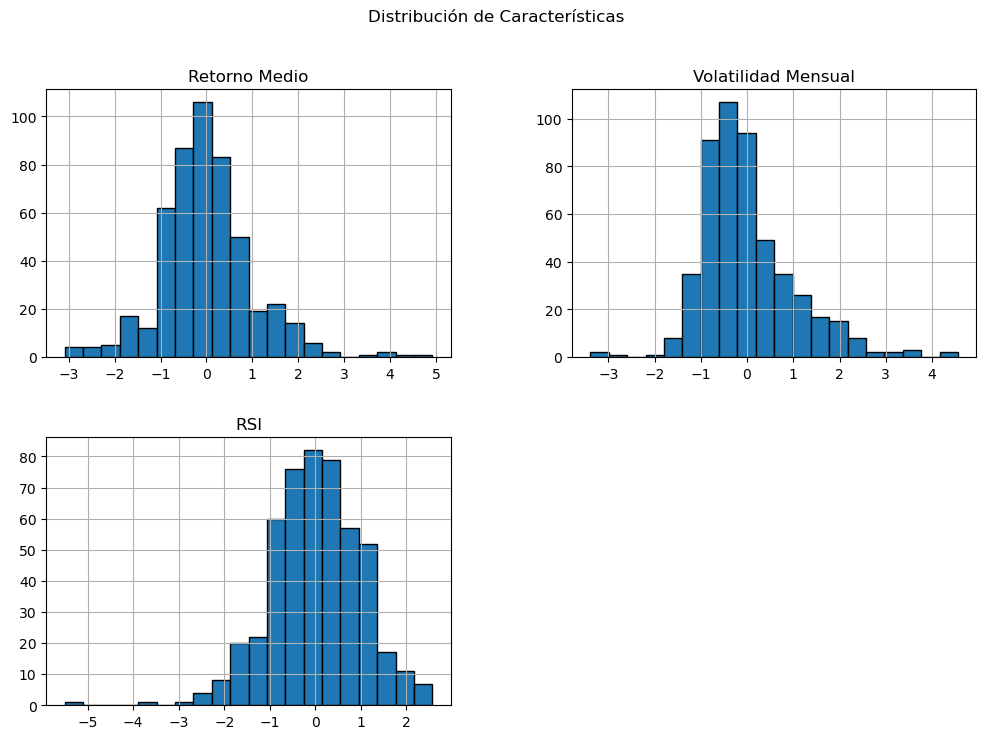

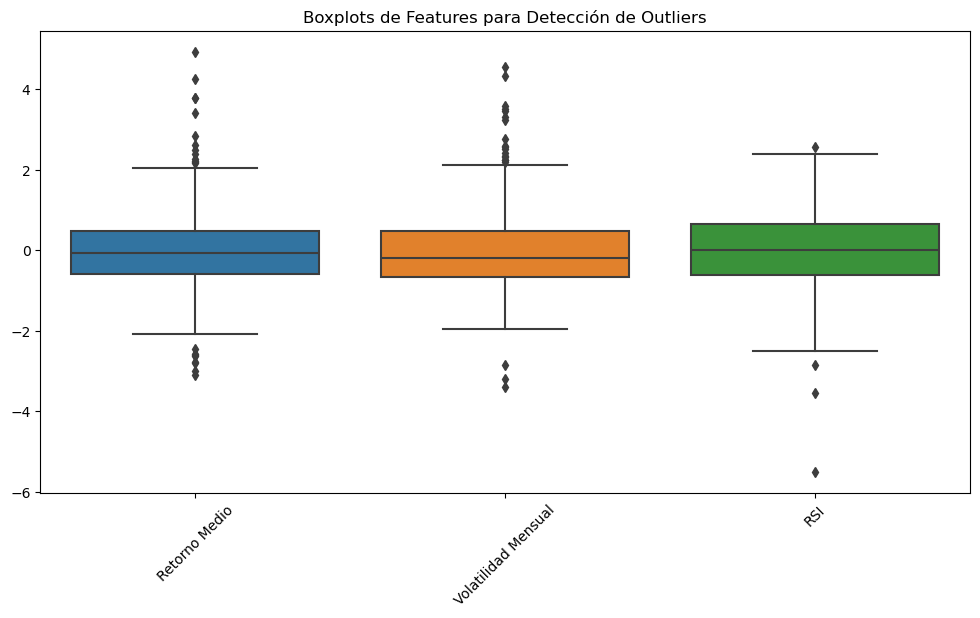

Outliers en Retorno Medio:
      Retorno Medio  Volatilidad Mensual       RSI
AMD        2.615277             2.185292  0.262522
BLDR       3.768757             1.775003  2.214997
CCL       -2.986502             3.458523 -2.201473
CDNS       2.209105             0.181304  2.150363
DASH      -2.450559             0.826861 -1.885183
ENPH       4.921272             4.558527  0.627310
FICO       2.201620             0.404581  1.723041
KLAC       2.383966             1.087120  1.476614
LRCX       2.842756             1.493134  1.225856
MRNA       2.263756             4.322212 -1.567231
NCLH      -2.634832             3.583904 -1.461002
NVDA       3.788221             1.923148  1.746859
PARA      -3.088391             2.041004 -2.413461
PWR        2.490994             0.133463  1.774247
SMCI       4.256554             2.232835  1.188302
SNPS       2.156642             0.071555  2.105534
TSLA       3.417159             3.298053  0.590337
UAL       -2.567712             2.013943 -1.908940
VTRS

In [3]:
# Notebook 3: Análisis Exploratorio de Datos (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de features procesadas
features = pd.read_csv("features_acciones.csv", index_col=0)

# Estadísticas descriptivas
print("Resumen estadístico de las características:")
print(features.describe())

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Features")
plt.show()

# Histogramas de distribución de cada feature
features.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribución de Características")
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=features)
plt.title("Boxplots de Features para Detección de Outliers")
plt.xticks(rotation=45)
plt.show()

# Análisis de outliers: mostrar valores extremos
for col in features.columns:
    q1 = features[col].quantile(0.25)
    q3 = features[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = features[(features[col] < lower_bound) | (features[col] > upper_bound)]
    print(f"Outliers en {col}:")
    print(outliers)

print("Análisis Exploratorio de Datos (EDA) completado.")


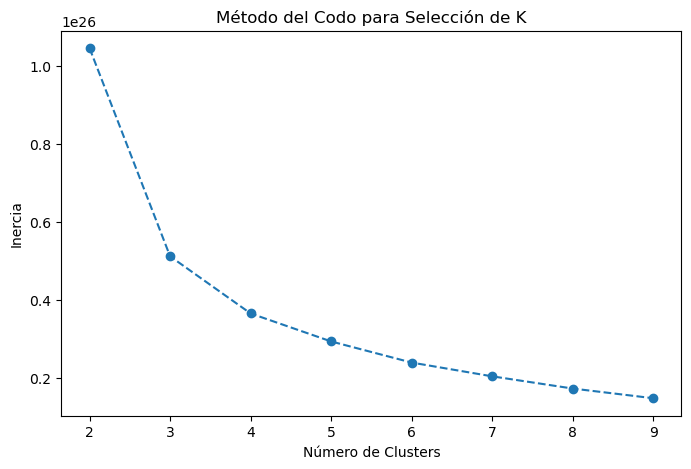

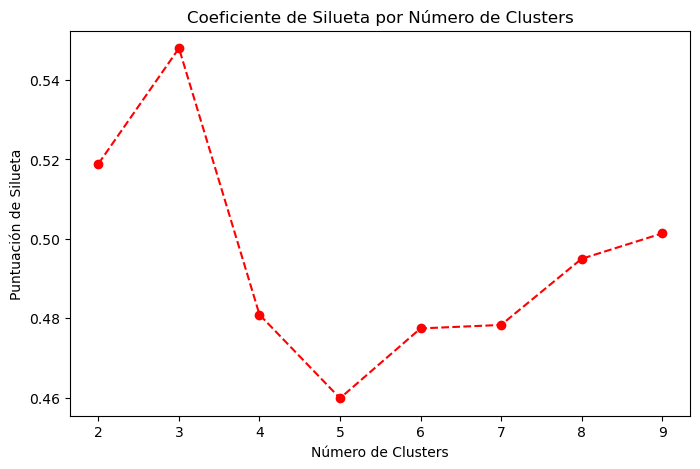

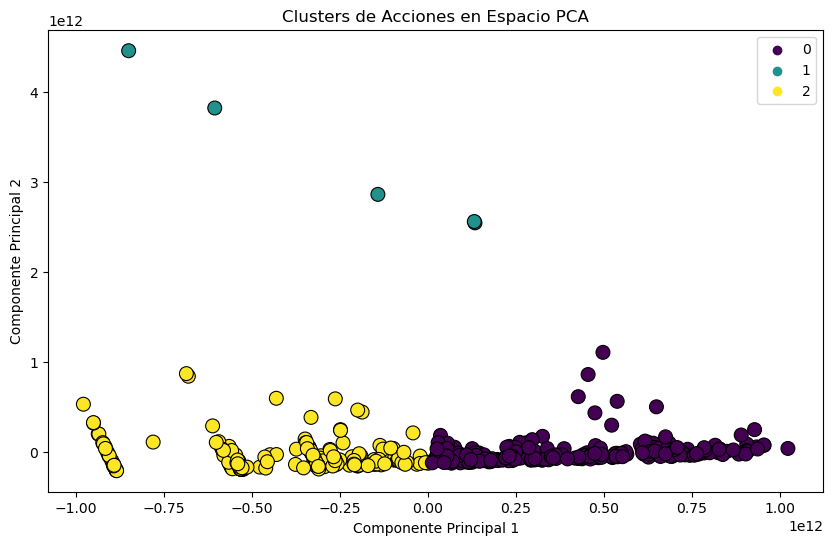

Clustering completado y guardado.


In [55]:
# Notebook 4: Clustering de Acciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Cargar las features procesadas
# features = pd.read_csv("features_acciones.csv", index_col=0)
features = pd.read_csv("acciones_preprocesadas.csv", index_col=0)
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
features = features[numerical_columns]
features = features.drop(features[features["beta"].isna()].index)  # Eliminar filas con valores nulos en shortName
features.fillna(0, inplace=True)  # Manejo de NaN
# Determinar número óptimo de clusters con el método del codo
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para Selección de K")
plt.show()

# Determinar número óptimo de clusters con el coeficiente de silueta
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Número de Clusters")
plt.ylabel("Puntuación de Silueta")
plt.title("Coeficiente de Silueta por Número de Clusters")
plt.show()

# Aplicar K-Means con el número óptimo de clusters (suponiendo K=4 basado en los gráficos)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features['Cluster'] = kmeans.fit_predict(features)

# Visualización de clusters con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.drop(columns=['Cluster']))
features['PCA1'] = pca_result[:, 0]
features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=features, palette='viridis', s=100, edgecolor='black')
plt.title("Clusters de Acciones en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Guardar los resultados de clustering
features.to_csv("features_clusters.csv")

print("Clustering completado y guardado.")

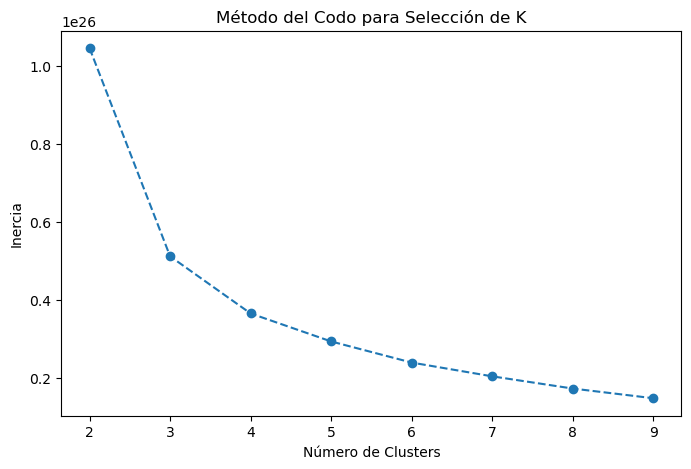

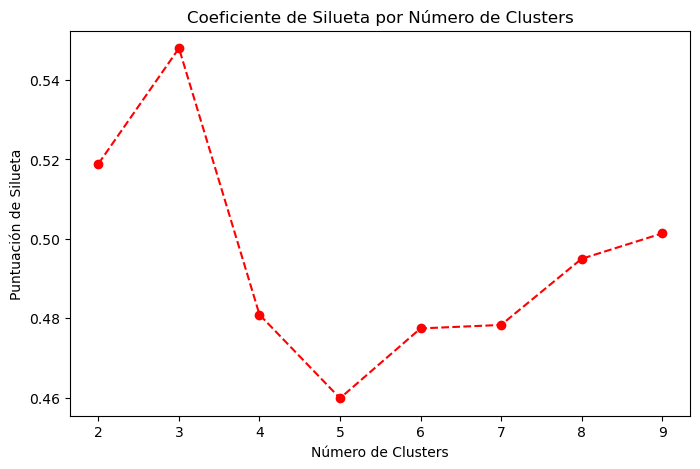

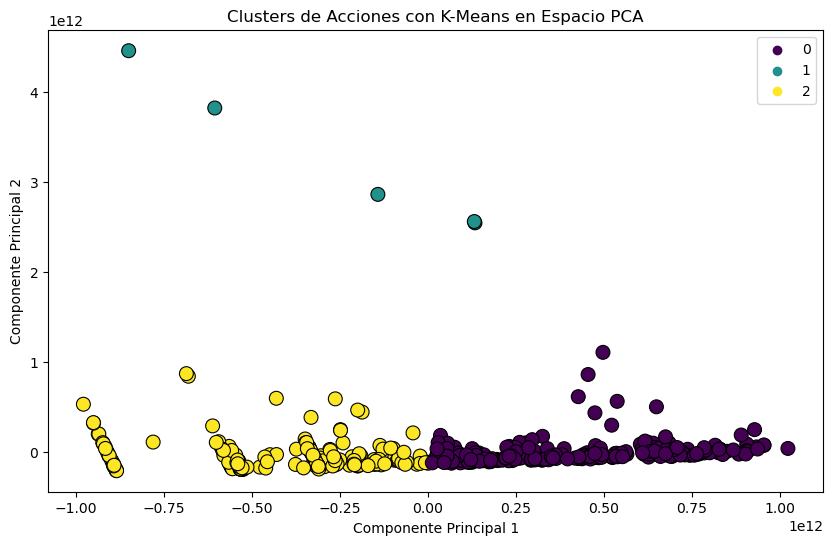

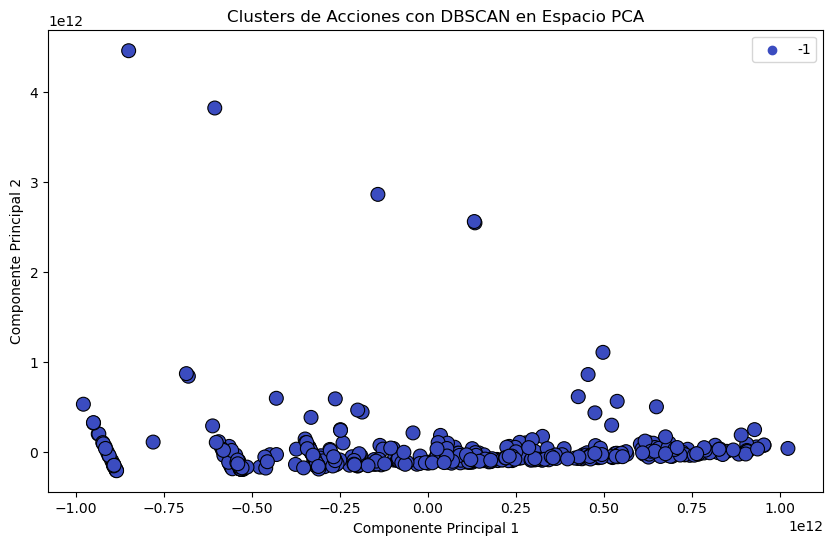

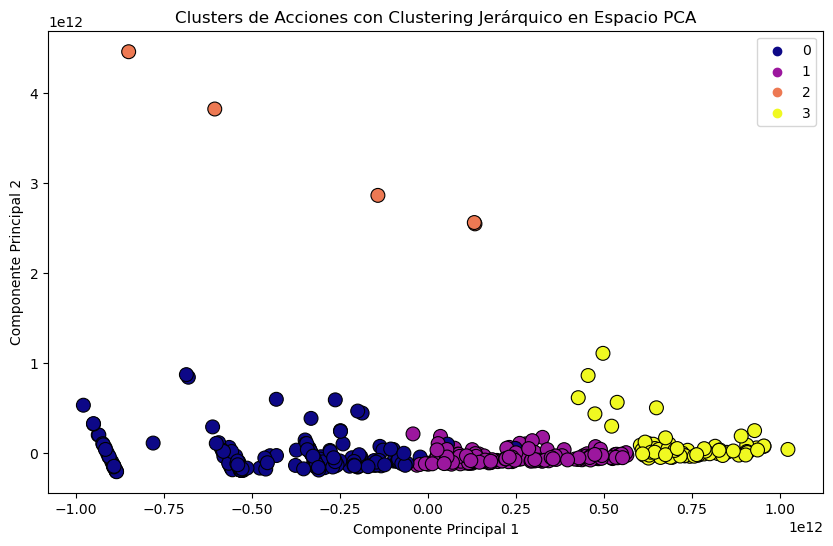

Clustering con K-Means, DBSCAN y Jerárquico completado y guardado.


In [56]:
# Notebook 4: Clustering de Acciones (K-Means, DBSCAN y Jerárquico)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Cargar las features procesadas
features = pd.read_csv("acciones_preprocesadas.csv", index_col=0)
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
features = features[numerical_columns]
features = features.drop(features[features["beta"].isna()].index)  # Eliminar filas con valores nulos en shortName
features.fillna(0, inplace=True)  # Manejo de NaN
# features = pd.read_csv("features_acciones.csv", index_col=0)
# features.fillna(0, inplace=True)  # Manejo de NaN
# Determinar número óptimo de clusters con el método del codo
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para Selección de K")
plt.show()

# Determinar número óptimo de clusters con el coeficiente de silueta
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Número de Clusters")
plt.ylabel("Puntuación de Silueta")
plt.title("Coeficiente de Silueta por Número de Clusters")
plt.show()

# Aplicar K-Means con el número óptimo de clusters (suponiendo K=4 basado en los gráficos)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=15)
features['Cluster_KMeans'] = kmeans.fit_predict(features)

# Aplicar DBSCAN para clustering basado en densidad
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Ajustar eps según los datos
features['Cluster_DBSCAN'] = dbscan.fit_predict(features)

# Aplicar Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
features['Cluster_Hierarchical'] = hierarchical.fit_predict(features)

# Visualización de clusters con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Hierarchical']))
features['PCA1'] = pca_result[:, 0]
features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=features, palette='viridis', s=100, edgecolor='black')
plt.title("Clusters de Acciones con K-Means en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', data=features, palette='coolwarm', s=100, edgecolor='black')
plt.title("Clusters de Acciones con DBSCAN en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', data=features, palette='plasma', s=100, edgecolor='black')
plt.title("Clusters de Acciones con Clustering Jerárquico en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Guardar los resultados de clustering
features.to_csv("features_clusters_comparacion.csv")

print("Clustering con K-Means, DBSCAN y Jerárquico completado y guardado.")


In [14]:
!pip install pyportfolioopt

   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   ------------------- -------------------- 30.7/62.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 62.7/62.7 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.1 MB 3.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.2 kB ? eta -:--:--
   ---------------------------------------- 72.2/72.2 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/742.5 kB ? eta -:--:--
   --------------------------------------- 742.5/742.5 kB 48.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --------------------------------------- 299.9/299.9 kB 18.1 MB/s eta 0:00:00
   ------------------------

c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\pypfopt\risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\pypfopt\risk_models.py:89: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(


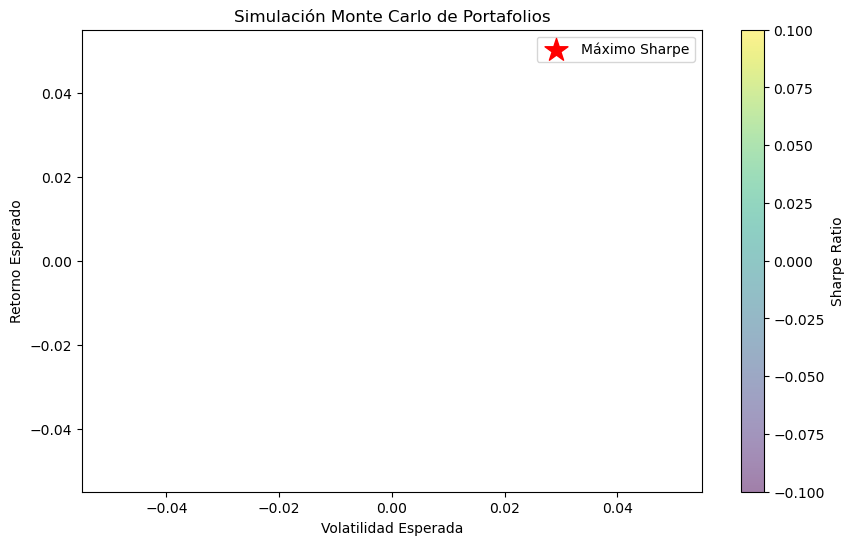

Optimización de cartera completada y guardada.


In [17]:
# Notebook 5: Optimización de Cartera con Monte Carlo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# Cargar datos de clustering y precios históricos
data = pd.read_csv("acciones_preprocesadas.csv", index_col=0, parse_dates=True)
features = pd.read_csv("features_clusters.csv", index_col=0)
#data.fillna(0,inplace=True)
#features.fillna(0,inplace=True)  # Manejo de NaN
# Cálculo de retornos diarios
returns = np.log(data / data.shift(1)).dropna()

# Cálculo de estadísticas para la optimización
mu = expected_returns.mean_historical_return(data)  # Retornos esperados
S = risk_models.sample_cov(data)  # Matriz de covarianza

# Simulación Monte Carlo de 5000 combinaciones
num_portfolios = 5000
results = np.zeros((4, num_portfolios))
weights_list = []
np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    
    port_return = np.dot(weights, mu)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
    sharpe_ratio = port_return / port_volatility
    
    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio
    results[3, i] = i
    weights_list.append(weights)

# Encontrar el portafolio con mejor Sharpe Ratio
max_sharpe_idx = results[2].argmax()
best_weights = weights_list[max_sharpe_idx]

# Visualización de la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], marker='*', color='red', s=300, label='Máximo Sharpe')
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Retorno Esperado')
plt.title('Simulación Monte Carlo de Portafolios')
plt.legend()
plt.show()

# Guardar la mejor asignación de pesos en el portafolio óptimo
optimal_portfolio = pd.DataFrame({"Ticker": data.columns, "Peso Óptimo": best_weights})
optimal_portfolio.to_csv("portafolio_optimo.csv", index=False)

print("Optimización de cartera completada y guardada.")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

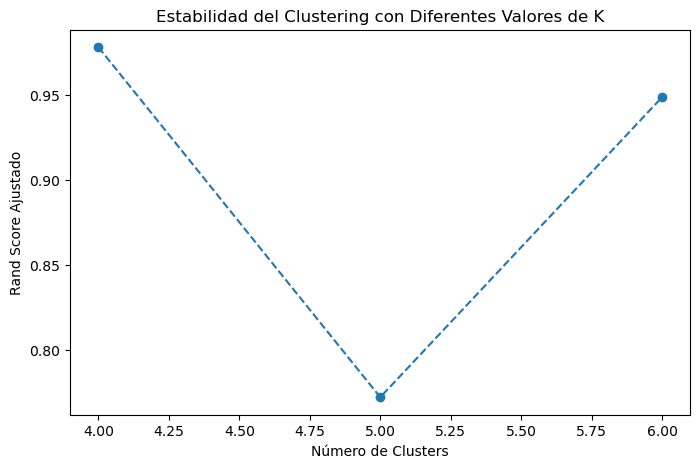

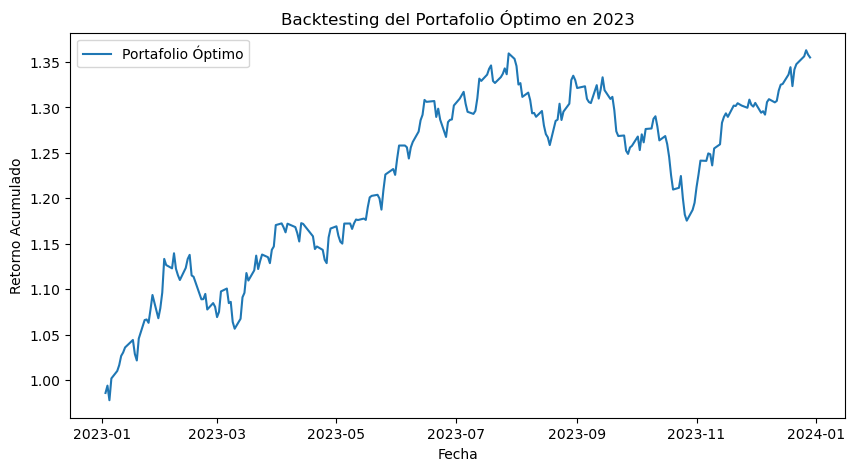

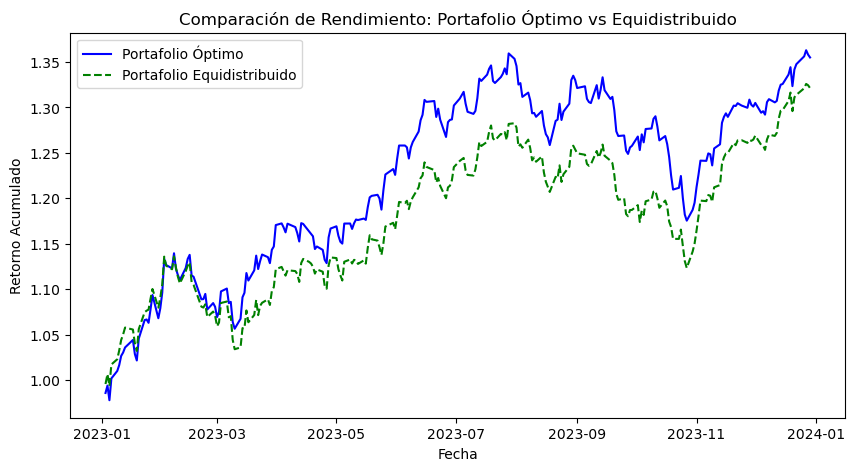

Validación de clusters y backtesting de estrategia completados.


In [8]:
# Notebook 6: Validación y Ajuste de Hiperparámetros

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# Cargar datos
features = pd.read_csv("features_clusters.csv", index_col=0)
data = pd.read_csv("acciones_preprocesadas.csv", index_col=0, parse_dates=True)
optimal_portfolio = pd.read_csv("portafolio_optimo.csv")

# Estabilidad del clustering con diferentes valores de K
k_values = range(3, 7)
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features.drop(columns=["Cluster", "PCA1", "PCA2"]))
    cluster_results[k] = labels

# Comparar estabilidad con Rand Score
rand_scores = []
k_prev = list(cluster_results.keys())[0]
for k in list(cluster_results.keys())[1:]:
    score = adjusted_rand_score(cluster_results[k_prev], cluster_results[k])
    rand_scores.append(score)
    k_prev = k

plt.figure(figsize=(8, 5))
plt.plot(list(k_values)[1:], rand_scores, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Rand Score Ajustado")
plt.title("Estabilidad del Clustering con Diferentes Valores de K")
plt.show()

# Backtesting de la estrategia de inversión en el último año
returns = np.log(data / data.shift(1)).dropna()
backtest_period = returns.loc["2023-01-01":"2023-12-31"]

# Obtener pesos óptimos del portafolio y calcular su retorno
portfolio_weights = dict(zip(optimal_portfolio["Ticker"], optimal_portfolio["Peso Óptimo"]))
portfolio_returns = backtest_period.dot(pd.Series(portfolio_weights))

# Calcular rendimiento acumulado
cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label="Portafolio Óptimo")
plt.title("Backtesting del Portafolio Óptimo en 2023")
plt.xlabel("Fecha")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.show()

# Comparación con portafolio equidistribuido
equal_weights = np.ones(len(backtest_period.columns)) / len(backtest_period.columns)
equal_portfolio_returns = backtest_period.dot(equal_weights)
equal_cumulative_returns = (1 + equal_portfolio_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label="Portafolio Óptimo", color='blue')
plt.plot(equal_cumulative_returns, label="Portafolio Equidistribuido", color='green', linestyle='--')
plt.title("Comparación de Rendimiento: Portafolio Óptimo vs Equidistribuido")
plt.xlabel("Fecha")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.show()

print("Validación de clusters y backtesting de estrategia completados.")
